# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

## My Dataset

The data set that I'm using is from Rebrickable.com (https://rebrickable.com/downloads/).  There are files with the following data: 

Themes, Colors, Parts (Categories), Parts, Parts (Relationships), Elements, Sets, Minifigures, Inventories, Inventory (Parts), Inventory (Sets), and Inventory (Minifigs).  It also has a feature that allows you to select the sets you have and create a file based on that, which I have uploaded.  

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [105]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 


In [106]:
our_sets = pd.read_csv("rebrickable_sets_aarich47.csv")
colors = pd.read_csv("colors.csv")
elements = pd.read_csv("elements.csv")
inventories = pd.read_csv("inventories.csv")
inv_mf = pd.read_csv("inventory_minifigs.csv")
inv_p = pd.read_csv("inventory_parts.csv")
inv_sets = pd.read_csv("inventory_sets.csv")
mf = pd.read_csv("minifigs.csv")
part_cat = pd.read_csv("part_categories.csv")
part_rel = pd.read_csv("part_relationships.csv")
parts = pd.read_csv("parts.csv")
sets = pd.read_csv("sets.csv")
themes = pd.read_csv("themes.csv")

our_sets.head(5)

,Set Number,Quantity
0,10698-1,1
1,60002-1,1
2,41062-1,1
3,60134-1,1
4,41094-1,1


In [107]:
sets.describe()

,year,theme_id,num_parts
count,20497.000000,20497.000000,20497.000000
mean,2007.114846,434.918671,160.052544
std,13.945181,216.708335,408.475176
min,1949.000000,1.000000,0.000000
25%,2001.000000,254.000000,4.000000
50%,2011.000000,494.000000,33.000000
75%,2018.000000,604.000000,142.000000
max,2023.000000,743.000000,11695.000000


In [108]:
#Joining data from Rebrickable sets to only have our listed sets' information. 
set_names = our_sets.join(sets.set_index('set_num'), on='Set Number')
set_names

,Set Number,Quantity,name,year,theme_id,num_parts,img_url
0,10698-1,1,Large Creative Brick Box,2015,621,790,https://cdn.rebrickable.com/media/sets/10698-1...
1,60002-1,1,Fire Truck,2013,58,209,https://cdn.rebrickable.com/media/sets/60002-1...
2,41062-1,1,Elsa's Sparkling Ice Castle,2015,687,292,https://cdn.rebrickable.com/media/sets/41062-1...
3,60134-1,1,People Pack - Fun in the Park,2016,52,159,https://cdn.rebrickable.com/media/sets/60134-1...
4,41094-1,1,Heartlake Lighthouse,2015,494,475,https://cdn.rebrickable.com/media/sets/41094-1...
...,...,...,...,...,...,...,...
59,76389-1,1,Hogwarts Chamber Of Secrets,2021,246,1172,https://cdn.rebrickable.com/media/sets/76389-1...
60,10293-1,1,Santa's Visit,2021,227,1445,https://cdn.rebrickable.com/media/sets/10293-1...
61,76397-1,1,Hogwarts Moment: Defence Against the Dark Arts...,2022,246,257,https://cdn.rebrickable.com/media/sets/76397-1...
62,76408-1,1,12 Grimmauld Place,2022,246,1086,https://cdn.rebrickable.com/media/sets/76408-1...


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [109]:
#I want to know what the sets' themes are, so first getting the unique values from theme_id. 
themes2 = set_names['theme_id'].unique()
df_themes = pd.DataFrame.from_dict(themes2)
df_themes = df_themes.rename(columns={0:'Theme ID'})
print(df_themes)

    Theme ID
0        621
1         58
2        687
3         52
4        494
5        579
6        228
7        435
8        616
9        576
10       600
11       246
12       702
13       696
14       640
15       682
16       206
17       610
18       721
19       227


In [110]:
#Now I'm going to find the values from the Themes df. 
name_themes = df_themes.join(themes.set_index('id'), on= 'Theme ID')
name_themes

,Theme ID,name,parent_id
0,621,Classic,NaN
1,58,Fire,52.0
2,687,Frozen,608.0
3,52,City,NaN
4,494,Friends,NaN
5,579,Disney Princess,NaN
6,228,Creator,227.0
7,435,Ninjago,NaN
8,616,Ninjago The Movie,435.0
9,576,LEGO Ideas and CUUSOO,NaN


In [111]:
#Counting number of occurrences
times = set_names['theme_id'].value_counts()
times = pd.DataFrame.from_dict(times)
times = times.rename(columns={0:'Theme ID', 'theme_id':'Number of Sets'})
times

,Number of Sets
246,24
435,8
579,6
494,5
600,3
721,3
687,2
696,1
610,1
206,1


In [112]:
set_year = set_names['year'].value_counts()
set_year = set_year.rename({'year':"count"})
set_year

2018    17
2019    13
2020    10
2021     8
2016     4
2015     3
2017     3
2022     3
2014     2
2013     1
Name: year, dtype: int64

In [116]:
#I also want to know what our largest sets are. 
set_names = set_names.sort_values('num_parts', ascending=False)
set_names

,Set Number,Quantity,name,year,theme_id,num_parts,img_url
23,70655-1,1,Dragon Pit,2018,435,1669,https://cdn.rebrickable.com/media/sets/70655-1...
60,10293-1,1,Santa's Visit,2021,227,1445,https://cdn.rebrickable.com/media/sets/10293-1...
33,41375-1,1,Heartlake City Amusement Pier,2019,494,1267,https://cdn.rebrickable.com/media/sets/41375-1...
55,10289-1,1,Bird of Paradise,2021,721,1173,https://cdn.rebrickable.com/media/sets/10289-1...
59,76389-1,1,Hogwarts Chamber Of Secrets,2021,246,1172,https://cdn.rebrickable.com/media/sets/76389-1...
...,...,...,...,...,...,...,...
45,40382-1,1,Birthday Set,2020,206,141,https://cdn.rebrickable.com/media/sets/40382-1...
35,75945-1,1,Expecto Patronum,2019,246,121,https://cdn.rebrickable.com/media/sets/75945-1...
10,70621-1,1,The Vermillion Attack,2017,435,83,https://cdn.rebrickable.com/media/sets/70621-1...
41,10899-1,1,Frozen Ice Castle,2019,640,59,https://cdn.rebrickable.com/media/sets/10899-1...


In [136]:
by_year = set_names.sort_values('year', ascending=True)
by_year

,Set Number,Quantity,name,year,theme_id,num_parts,img_url
1,60002-1,1,Fire Truck,2013,58,209,https://cdn.rebrickable.com/media/sets/60002-1...
5,41055-1,1,Cinderella’s Romantic Castle,2014,579,647,https://cdn.rebrickable.com/media/sets/41055-1...
7,10245-1,1,Santa’s Workshop,2014,228,884,https://cdn.rebrickable.com/media/sets/10245-1...
0,10698-1,1,Large Creative Brick Box,2015,621,790,https://cdn.rebrickable.com/media/sets/10698-1...
4,41094-1,1,Heartlake Lighthouse,2015,494,475,https://cdn.rebrickable.com/media/sets/41094-1...
...,...,...,...,...,...,...,...
58,76388-1,1,Hogsmeade Village Visit,2021,246,847,https://cdn.rebrickable.com/media/sets/76388-1...
59,76389-1,1,Hogwarts Chamber Of Secrets,2021,246,1172,https://cdn.rebrickable.com/media/sets/76389-1...
62,76408-1,1,12 Grimmauld Place,2022,246,1086,https://cdn.rebrickable.com/media/sets/76408-1...
63,76406-1,1,Hungarian Horntail Dragon,2022,246,671,https://cdn.rebrickable.com/media/sets/76406-1...


## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

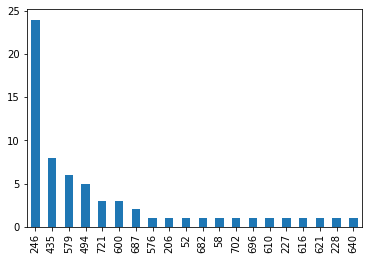

<AxesSubplot:>

In [121]:
set_names.theme_id.value_counts().plot(kind='bar')

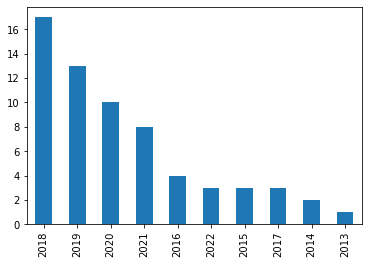

<AxesSubplot:>

In [122]:
set_names.year.value_counts().plot(kind='bar')

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset?

I was surprised to see that the largest sets in my family aren't the Harry Potter sets that I expected to see, but were some of the other more random sets. 

1. Do you have any concerns about your dataset?

Since I am using data from my family's collection, I don't have information about when the sets were added, which does impact my analysis since some sets were purchased on discounts or were older and bought because my children had an interest in that particular set.  I can only analyze the data based on what year the set came out, so the trends can be mis-representative. 

1. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data?

I know that the Rebrickable database is supported by the users of the site, so I will be interested to see how accurate or clean the data is.